In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv('C:\\Users\\pavan\\Desktop\\Applied AI course\\Assignments\\haberman.csv')
haberman.head()


,Age,Op_Year,axil_nodes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [64]:
print(haberman.shape)   #No. of data-poins and features
print(haberman.columns)


(306, 4)
Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')


In [65]:

haberman["Surv_status"].value_counts() #data-points of each class

1    225
2     81
Name: Surv_status, dtype: int64

In [66]:
# Objective:-The goal is to analyze the data and come up with some rule which will be useful in classifying a patient whether he is going to survive more than 5 years or not from the given haberman dataset.


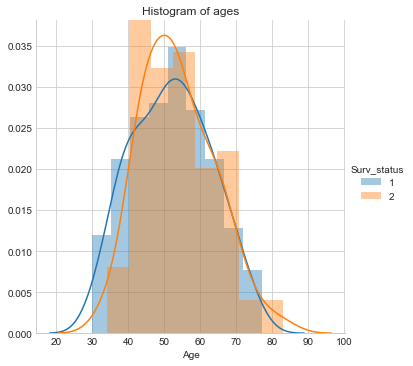

In [67]:
# Univarite analysis to describe and analuze data patterns using single feauture.(Histogram of Age)
df = pd.read_csv('C:\\Users\\pavan\\Desktop\\Applied AI course\\Assignments\\haberman.csv')

sns.FacetGrid(haberman, hue="Surv_status", size=5)\
   .map(sns.distplot, 'Age')\
   .add_legend()
plt.title('Histogram of ages')
plt.show()

We have found that the age lies b/w 52-58 a lot for class1 patients & also for class2 patients the age lies b/w 40-46. So we will get a more overlapping b/w patients with survival status=1 & those withsurvival status=2 

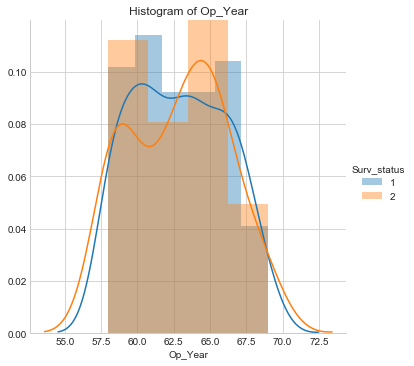

In [68]:

# Univarite analysis to describe and analyze data patterns using single feauture.(Histogram of Op_Year)
df = pd.read_csv('C:\\Users\\pavan\\Desktop\\Applied AI course\\Assignments\\haberman.csv')

sns.FacetGrid(haberman, hue= "Surv_status", size=5)\
   .map(sns.distplot, 'Op_Year')\
   .add_legend()
plt.title('Histogram of Op_Year')
plt.show()

A large number of class 1 patients done their operation in the year 1960-1961. In class 2, the maximum number of patients done their operation in the year 1965. Again, we get a massive overlapping between patients with survival status =1 and those with survival status = 2.

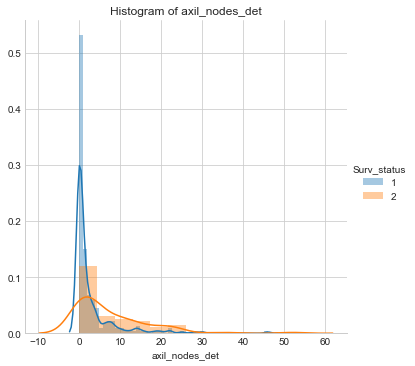

In [69]:

# Univarite analysis to describe and analyze data patterns using single feauture.(Histogram of axil_nodes_det)
df = pd.read_csv('C:\\Users\\pavan\\Desktop\\Applied AI course\\Assignments\\haberman.csv')

sns.FacetGrid(haberman, hue= "Surv_status", size=5)\
   .map(sns.distplot, 'axil_nodes_det')\
   .add_legend()
plt.title('Histogram of axil_nodes_det')
plt.show()

Maximum number of axil nodes is 0 for both Class 1 and Class 2 patients. The other variables are overlapping to a huge extent hence it cannot be used. So for univariate analysis we can use axil_nodes.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


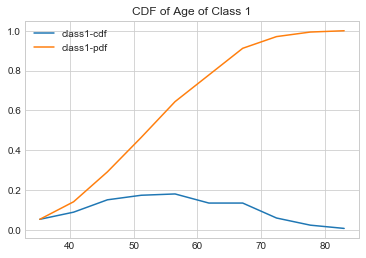

In [70]:
#Plotting CDF of Age

data_less = haberman.loc[haberman['Surv_status'] == 1]
data_more = haberman.loc[haberman['Surv_status'] == 2]

sns.set_style('whitegrid')
counts, bin_edges = np.histogram(haberman['Age'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('CDF of Age of Class 1')
plt.legend(['class1-cdf','class1-pdf'])

plt.show()



[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


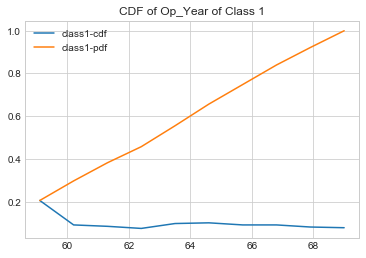

In [71]:
#Plotting CDF of Op_Year

data_less = haberman.loc[haberman['Surv_status'] == 1]
data_more = haberman.loc[haberman['Surv_status'] == 2]

sns.set_style('whitegrid')
counts, bin_edges = np.histogram(haberman['Op_Year'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('CDF of Op_Year of Class 1')
plt.legend(['class1-cdf','class1-pdf'])

plt.show()



[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


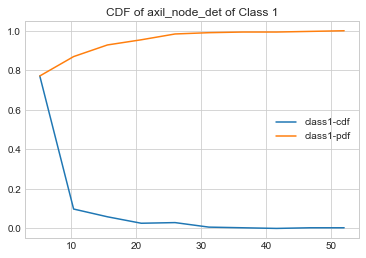

In [72]:
#Plotting CDF of axil_nodes_det

data_less = haberman.loc[haberman['Surv_status'] == 1]
data_more = haberman.loc[haberman['Surv_status'] == 2]

sns.set_style('whitegrid')
counts, bin_edges = np.histogram(haberman['axil_nodes_det'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('CDF of axil_node_det of Class 1')
plt.legend(['class1-cdf','class1-pdf'])

plt.show()



There are 98% of people in class1 whose atleast 20 axil nodes are effected. Therefore patients who had less than 20 axil nodes effected had a higher chance of surviving for more than 5 years.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


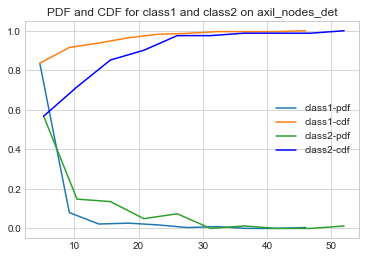

In [93]:
#For patients who lived more than 5 years

sns.set_style('whitegrid')
counts, bin_edges = np.histogram(data_less['axil_nodes_det'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#For patients who lived less than 5 years

counts, bin_edges = np.histogram(data_more['axil_nodes_det'], bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, color = 'blue')
plt.legend(['class1-pdf', 'class1-cdf','class2-pdf', 'class2-cdf']);
plt.title('PDF and CDF for class1 and class2 on axil_nodes_det')
plt.show()





For class1-around 88-100% people have 5 to 25 nodes affected. For class2- around 58-100% people have 5 to 38 nodes affected. Therefore, patients who has more than 25 axillary nodes affected could not survive for more than 5 years.

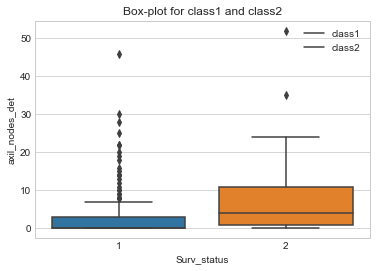

In [85]:
# Box-plot with whiskers

sns.boxplot( data=haberman, x='Surv_status', y='axil_nodes_det')
plt.title("Box-plot for class1 and class2")
plt.legend(['class1','class2'])
plt.show()

Around 25% of the people have 0 to 5 axil nodes effected. There are alot of outliers in this box plot. For class 2 : Around 50 % of the people have 1 to 11 axil nodes effected. There are a few outliers in this box plot.

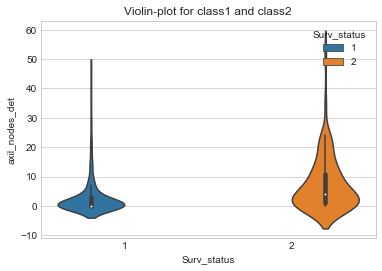

In [81]:
# Violin-plot
sns.violinplot( data=haberman, x='Surv_status', y='axil_nodes_det', hue='Surv_status', size=8)
plt.title("Violin-plot for class1 and class2")
plt.show()

For Class1 : The whiskers shows the max value of axillary nodes effected i.e <=50. The pdf on the side shows maximum axillary nodes effected at zero. 
For Class2 : Maximum axil_nodes effected for class 2 is <= 60. The pdf on the sides is less steeper than that pf class 1 and shows peaked at zero.

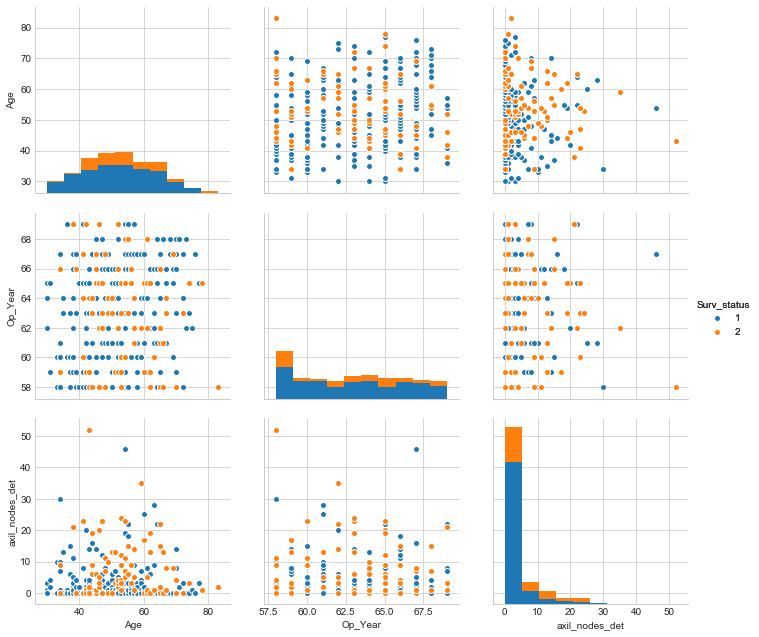

In [88]:
#Pair-plots
plt.close()
sns.set_style("whitegrid");
sns.pairplot(haberman,vars = ['Age', 'Op_Year', 'axil_nodes_det'], hue="Surv_status", size = 3).add_legend();
plt.show()


1. Only the feautures age vs axil_nodes-det give somewhat a clear view/plot for both the classes
2. For other plots, all the points are overlapping a lot
3. Most of the axil_nodes fall b/w the interval0-10 for both class1 and class2 patients

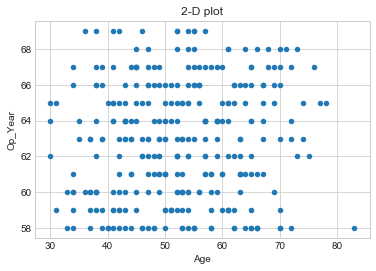

In [86]:
#2-D Scatter-plots

haberman.plot(kind='scatter', x='Age', y='Op_Year')
plt.title("2-D plot")
plt.show()

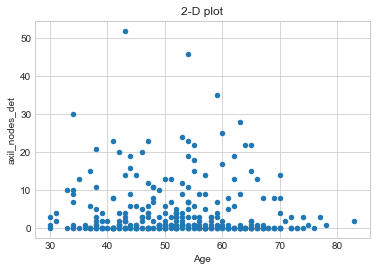

In [89]:
#2-D Scatter-plots

haberman.plot(kind='scatter', x='Age', y='axil_nodes_det')
plt.title("2-D plot")
plt.show()

Cannot make much assumptions/inferences about the data from the above plot.